In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("/content/drive/MyDrive/CSE-PROJECTS/spam.csv",encoding="ISO-8859-1")

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2364,ham,Ok then no need to tell me anything i am going...,NaN,NaN,NaN
3315,ham,I know girls always safe and selfish know i go...,NaN,NaN,NaN
3867,ham,"not that I know of, most people up here are st...",NaN,NaN,NaN
157,ham,"Hello, my love. What are you doing? Did you ge...",NaN,NaN,NaN
2084,ham,How are you. Wish you a great semester,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)


In [7]:
df.head(4)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...


In [8]:
df.rename(columns={'v1':'Target','v2':'Text'}, inplace=True)

In [9]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.isnull().sum()

,0
Target,0
Text,0


In [11]:
df.duplicated().sum()

403

In [12]:
df=df.drop_duplicates(keep='first')

In [13]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.duplicated().sum()

0

In [15]:
df['Target'].value_counts()

,count
Target,
ham,4516
spam,653


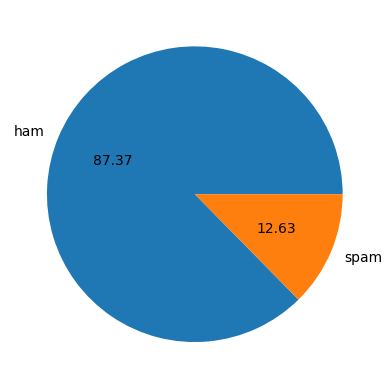

In [16]:
from matplotlib import pyplot as plt
plt.pie(df['Target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [17]:
df['characters_len']=df['Text'].apply(len)

In [18]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
df.head()

,Target,Text,characters_len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
df['num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [21]:
df.head()

,Target,Text,characters_len,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [22]:
df['num_sentence']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [23]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [24]:
df['Target']=encoder.fit_transform(df['Target'])

In [25]:
df.head()

,Target,Text,characters_len,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
import seaborn as sns

In [27]:
df[df['Target']==0]

,Target,Text,characters_len,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
6,0,Even my brother is not like to speak with me. ...,77,18,2
...,...,...,...,...,...
5565,0,Huh y lei...,12,4,1
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [28]:
df[df['Target']==0][['num_words','num_sentence','characters_len']].describe()

,num_words,num_sentence,characters_len
count,4516.000000,4516.000000,4516.000000
mean,17.123782,1.820195,70.459256
std,13.493970,1.383657,56.358207
min,1.000000,1.000000,2.000000
25%,8.000000,1.000000,34.000000
50%,13.000000,1.000000,52.000000
75%,22.000000,2.000000,90.000000
max,220.000000,38.000000,910.000000


In [29]:
df[df['Target']==1][['num_words','num_sentence','characters_len']].describe()

,num_words,num_sentence,characters_len
count,653.000000,653.000000,653.000000
mean,27.667688,2.970904,137.891271
std,7.008418,1.488425,30.137753
min,2.000000,1.000000,13.000000
25%,25.000000,2.000000,132.000000
50%,29.000000,3.000000,149.000000
75%,32.000000,4.000000,157.000000
max,46.000000,9.000000,224.000000


<Axes: xlabel='num_words', ylabel='Count'>

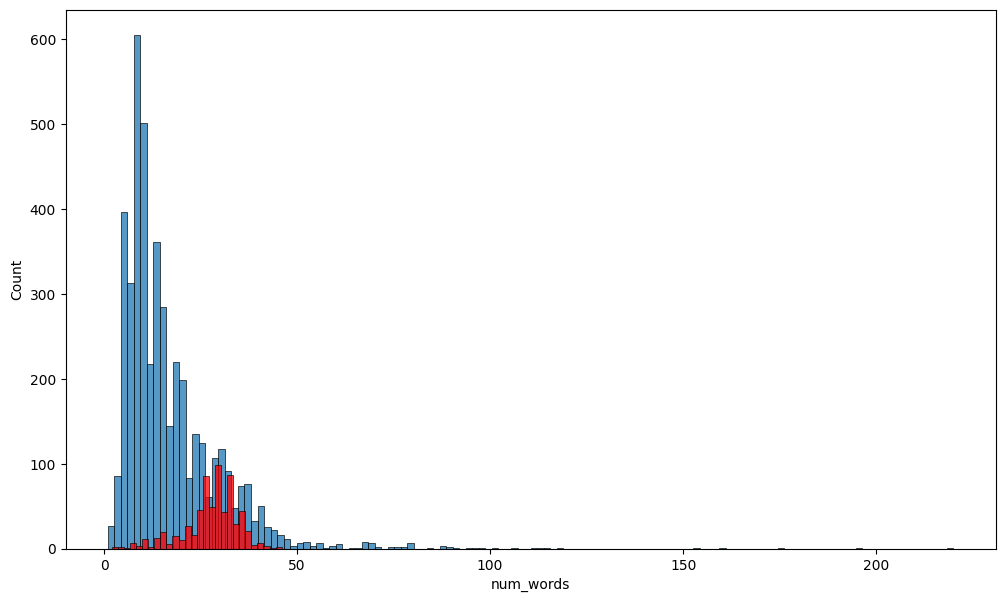

In [30]:
plt.figure(figsize=(12,7))
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'],color='red')

<Axes: xlabel='num_sentence', ylabel='Count'>

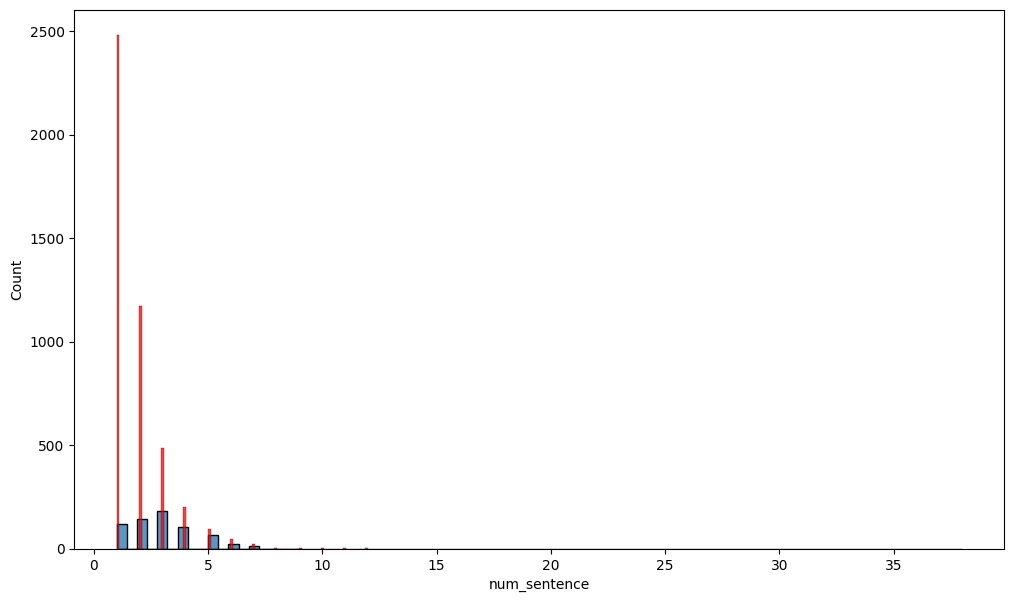

In [31]:
plt.figure(figsize=(12,7))
sns.histplot(df[df['Target']==1]['num_sentence'])
sns.histplot(df[df['Target']==0]['num_sentence'],color='red')

<Axes: xlabel='characters_len', ylabel='Count'>

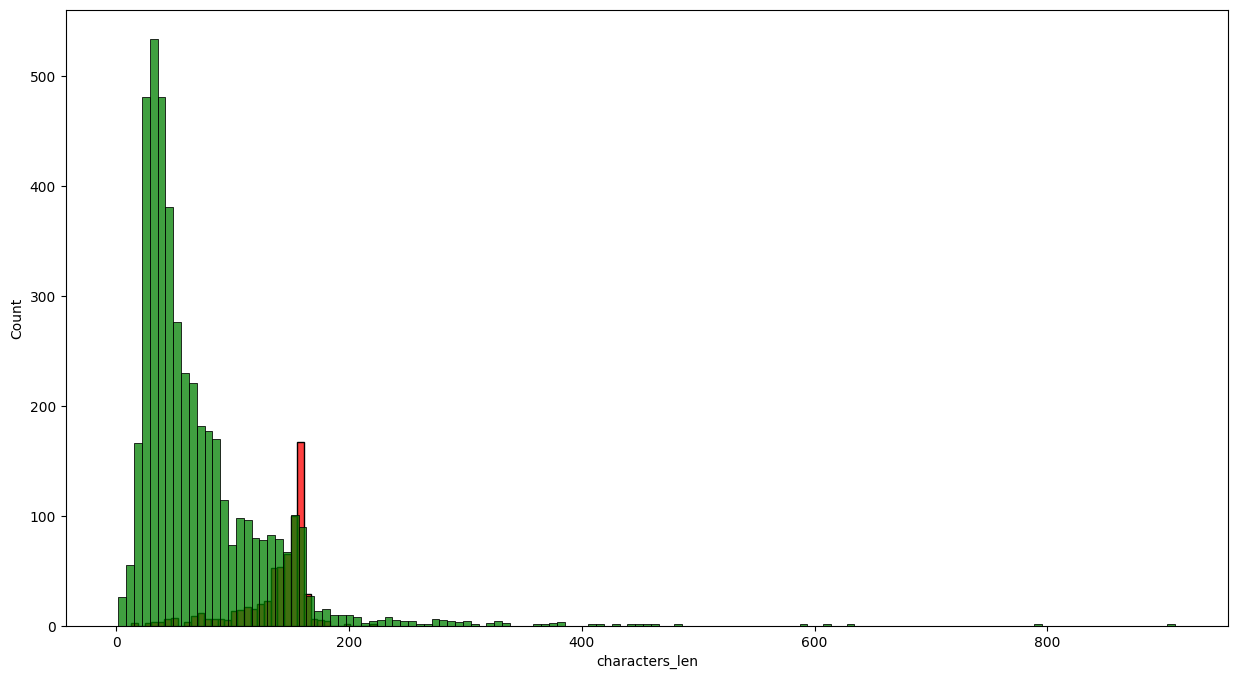

In [32]:
plt.figure(figsize=(15,8))
sns.histplot(df[df['Target']==1]['characters_len'],color='red')
sns.histplot(df[df['Target']==0]['characters_len'],color='green')

In [33]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
import string

In [36]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [37]:
def text_transform(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words ('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))


  return " ".join(y)


In [38]:
text_transform("hello dear loved ?? are u")

'hello dear love u'

In [39]:
df['transformed_text']=df['Text'].apply(text_transform)

In [40]:
df.head()

,Target,Text,characters_len,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [41]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500, min_font_size=10, background_color='white')

In [42]:
spam_wc=wc.generate(df[df['Target']==1]['transformed_text'].str.cat(sep=" "))

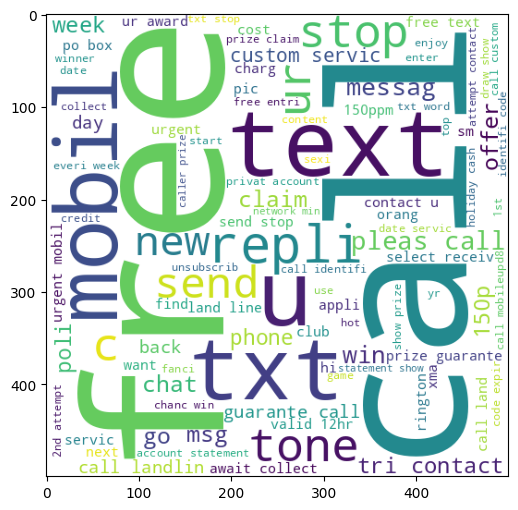

In [43]:
plt.figure(figsize=(10,6))
plt.imshow(spam_wc)

In [44]:
ham_wc=wc.generate(df[df['Target']==0]['transformed_text'].str.cat(sep=" "))

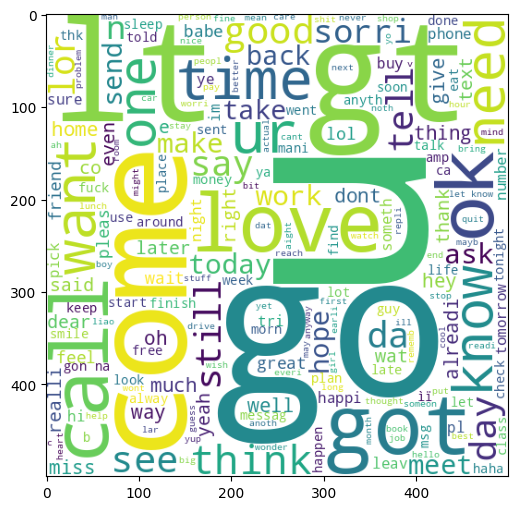

In [45]:
plt.figure(figsize=(10,6))
plt.imshow(ham_wc)

In [46]:
df.head()

,Target,Text,characters_len,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [47]:
spam_corpus=[]
for msg in df[df['Target']==1]['transformed_text'].to_list():
  for word in msg.split():
    spam_corpus.append(word)

In [48]:
len(spam_corpus)

9939

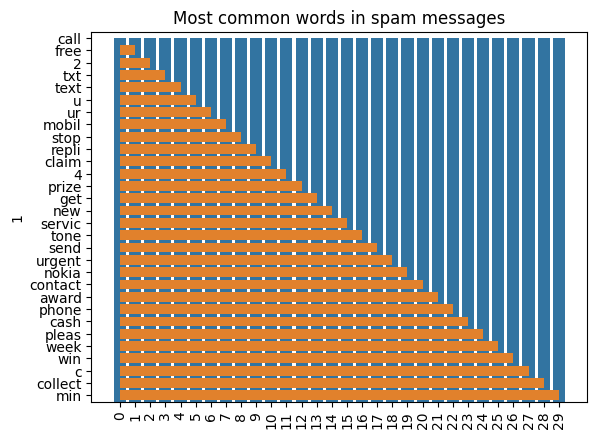

In [49]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[1]).set_title('Most common words in spam messages')
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])

plt.xticks(rotation='vertical')
plt.show()

In [50]:
df.head()

,Target,Text,characters_len,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


#Model Building

In [51]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [52]:
x=tfidf.fit_transform(df['transformed_text']).toarray()

In [153]:
#x=np.hstack((x,df['characters_len'].values.reshape(-1,1)))

In [128]:
#from sklearn.preprocessing import MinMaxScaler
#scaler=MinMaxScaler()
#x=scaler.fit_transform(x)

In [53]:
x.shape

(5169, 3000)

In [54]:
y=df['Target'].values

In [55]:
y.shape

(5169,)

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [58]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [59]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [136]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)


In [60]:
from sklearn.metrics import accuracy_score, precision_score,confusion_matrix,classification_report

In [138]:
print('Accuracy of Gaussian naive bayes', accuracy_score(y_test,y_pred1))
print('precision of GNB is=',precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

Accuracy of Gaussian naive bayes 0.8597678916827853
precision of GNB is= 0.46320346320346323
[[782 124]
 [ 21 107]]
              precision    recall  f1-score   support

           0       0.97      0.86      0.92       906
           1       0.46      0.84      0.60       128

    accuracy                           0.86      1034
   macro avg       0.72      0.85      0.76      1034
weighted avg       0.91      0.86      0.88      1034



In [61]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)

In [62]:
print('Accuracy of Multinomial naive bayes', accuracy_score(y_test,y_pred2))
print('precision of MNB is=',precision_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

Accuracy of Multinomial naive bayes 0.9748549323017408
precision of MNB is= 1.0
[[906   0]
 [ 26 102]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       906
           1       1.00      0.80      0.89       128

    accuracy                           0.97      1034
   macro avg       0.99      0.90      0.94      1034
weighted avg       0.98      0.97      0.97      1034



In [141]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print('Accuracy of Bernaullis naive bayes', accuracy_score(y_test,y_pred3))
print('precision of BNB is=',precision_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

Accuracy of Bernaullis naive bayes 0.9787234042553191
precision of BNB is= 0.9732142857142857
[[903   3]
 [ 19 109]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       906
           1       0.97      0.85      0.91       128

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score,confusion_matrix,classification_report


In [64]:
lr=LogisticRegression(solver='liblinear', penalty='l1')
sv=SVC(kernel='sigmoid',gamma=1.0 )
dt=DecisionTreeClassifier(max_depth=5)
kn=KNeighborsClassifier()
rf=RandomForestClassifier(n_estimators=50, random_state=2)
ada=AdaBoostClassifier(n_estimators=50, random_state=2)
et=ExtraTreesClassifier(n_estimators=50, random_state=2)
gb=GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb=XGBClassifier(n_estimators=50, random_state=2)

In [65]:
import numpy as np

In [66]:
clfs = {
    'LR': LogisticRegression(),  # Initialize LogisticRegression
    'SVC': SVC(),  # Initialize SVC
    'DT': DecisionTreeClassifier(),  # Initialize DecisionTreeClassifier
    'KNN': KNeighborsClassifier(),  # Initialize KNeighborsClassifier
    'RF': RandomForestClassifier(),  # Initialize RandomForestClassifier
    'ADA': AdaBoostClassifier(),  # Initialize AdaBoostClassifier
    'ET': ExtraTreesClassifier(),  # Initialize ExtraTreesClassifier
    'GB': GradientBoostingClassifier(),  # Initialize GradientBoostingClassifier
    'XGB': XGBClassifier(),  # Initialize XGBClassifier
    "NB": MultinomialNB(),  # Initialize MultinomialNB
}

In [147]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
  clf.fit(x_train,y_train)
  y_pred=clf.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)
  return accuracy,precision

In [148]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
  current_accuracy,current_precision=train_classifier(clf,x_train,y_train,x_test,y_test)
  print("For ",name)
  print("Accuracy - ",current_accuracy)
  print("Precision - ",current_precision)
  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For  LR
Accuracy -  0.97678916827853
Precision -  0.9905660377358491
For  SVC
Accuracy -  0.9777562862669246
Precision -  0.9906542056074766
For  DT
Accuracy -  0.9535783365570599
Precision -  0.803030303030303
For  KNN
Accuracy -  0.9158607350096711
Precision -  0.9767441860465116
For  RF
Accuracy -  0.9700193423597679
Precision -  0.970873786407767


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  ADA
Accuracy -  0.9622823984526112
Precision -  0.9405940594059405
For  ET
Accuracy -  0.9758220502901354
Precision -  0.9478260869565217
For  GB
Accuracy -  0.9593810444874274
Precision -  0.9574468085106383
For  XGB
Accuracy -  0.9709864603481625
Precision -  0.9375
For  NB
Accuracy -  0.9806576402321083
Precision -  0.9576271186440678


In [99]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [100]:
performance_df

,Algorithm,Accuracy,Precision
0,LR,0.978723,1.000000
1,SVC,0.970019,1.000000
3,KNN,0.911025,1.000000
4,RF,0.970986,1.000000
6,ET,0.971954,0.990099
7,GB,0.967118,0.989583
8,XGB,0.976789,0.964286
5,ADA,0.961315,0.923077
2,DT,0.971954,0.915966
9,NB,0.974855,0.892308


In [74]:
#performance_df.merge(performance_df1,on='Algorithm')

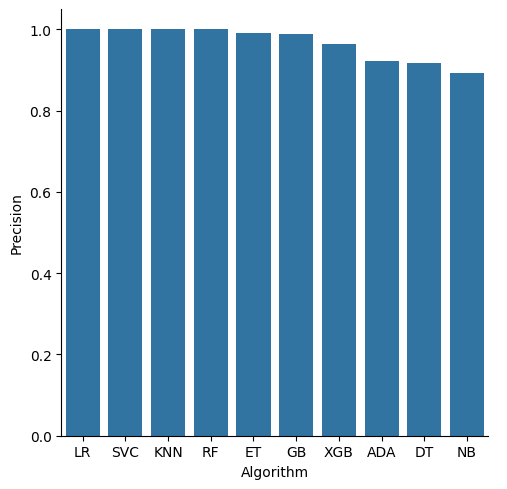

In [101]:
sns.catplot(x='Algorithm',y='Precision',data=performance_df,kind='bar')

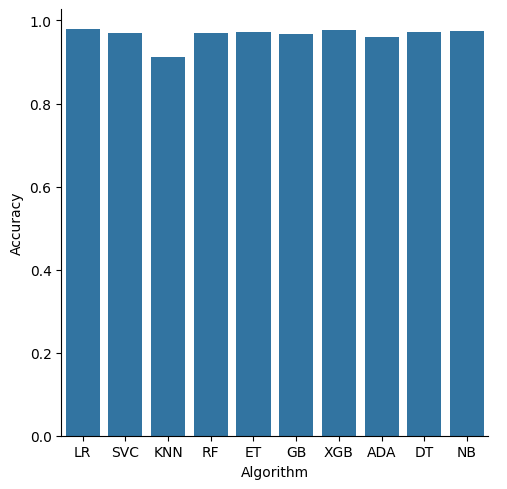

In [102]:
sns.catplot(x='Algorithm',y='Accuracy',data=performance_df,kind='bar')

 # Apply tfidf for improving performance

In [69]:
#temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_tf_idf':accuracy_scores,'Precision_tf_idf':precision_scores}).sort_values('Precision_tf_idf',ascending=False)

In [149]:
temp_df1=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_Scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [126]:
temp_df

,Algorithm,Accuracy_tf_idf,Precision_tf_idf
3,KNN,0.913926,1.000000
9,NB,0.973888,1.000000
1,SVC,0.976789,0.990991
4,RF,0.973888,0.990741
7,GB,0.965184,0.980198
0,LR,0.961315,0.969697
6,ET,0.975822,0.965517
5,ADA,0.962282,0.943396
8,XGB,0.969052,0.939130
2,DT,0.960348,0.859375


In [127]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_tf_idf,Precision_tf_idf
0,LR,0.978723,1.000000,0.961315,0.969697
1,SVC,0.970019,1.000000,0.976789,0.990991
2,KNN,0.911025,1.000000,0.913926,1.000000
3,RF,0.970986,1.000000,0.973888,0.990741
4,ET,0.971954,0.990099,0.975822,0.965517
5,GB,0.967118,0.989583,0.965184,0.980198
6,XGB,0.976789,0.964286,0.969052,0.939130
7,ADA,0.961315,0.923077,0.962282,0.943396
8,DT,0.971954,0.915966,0.960348,0.859375
9,NB,0.974855,0.892308,0.973888,1.000000


In [150]:
new_df=performance_df.merge(temp_df,on='Algorithm').merge(temp_df1,on='Algorithm')

In [151]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_tf_idf,Precision_tf_idf,Accuracy_Scaling,Precision_scaling
0,LR,0.978723,1.000000,0.961315,0.969697,0.976789,0.990566
1,SVC,0.970019,1.000000,0.976789,0.990991,0.977756,0.990654
2,KNN,0.911025,1.000000,0.913926,1.000000,0.915861,0.976744
3,RF,0.970986,1.000000,0.973888,0.990741,0.970019,0.970874
4,ET,0.971954,0.990099,0.975822,0.965517,0.975822,0.947826
5,GB,0.967118,0.989583,0.965184,0.980198,0.959381,0.957447
6,XGB,0.976789,0.964286,0.969052,0.939130,0.970986,0.937500
7,ADA,0.961315,0.923077,0.962282,0.943396,0.962282,0.940594
8,DT,0.971954,0.915966,0.960348,0.859375,0.953578,0.803030
9,NB,0.974855,0.892308,0.973888,1.000000,0.980658,0.957627


In [155]:
# Voting classifier
svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
from sklearn.ensemble import VotingClassifier
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [156]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [157]:
voting_pred=voting.predict(x_test)
print("Accuracy Score for Voting Classifier",accuracy_score(y_test,voting_pred))
print("Precision Score for Voting Classifier",precision_score(y_test,voting_pred))

Accuracy Score for Voting Classifier 0.9796905222437138
Precision Score for Voting Classifier 0.9572649572649573


In [158]:
from sklearn.ensemble import StackingClassifier

In [161]:
# Applying Stacking
estimators=[('svm',svc),('nb',mnb),('et',etc)]
from sklearn.ensemble import StackingClassifier
clf=StackingClassifier(estimators=estimators,final_estimator=RandomForestClassifier())

In [162]:
clf.fit(x_train,y_train)
clf_pred=clf.predict(x_test)
print("Accuracy Score for Stacking Classifier",accuracy_score(y_test,clf_pred))
print("Precision Score for Stacking Classifier",precision_score(y_test,clf_pred))

Accuracy Score for Stacking Classifier 0.9806576402321083
Precision Score for Stacking Classifier 0.9576271186440678


In [70]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))